# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# Import Data

In [3]:
#define path to prepared data folder
preparedDataPath= r'C:\Users\user\nycpayrollanalysis\02 Data\prepareddata'

In [ ]:
goodcols=["Agency Name","Agency Start Date"]
df=pd.read_csv(os.path.join(preparedDataPath,'payroll_clean.csv'),usecols=goodcols,index_col = False)

In [ ]:
df.head()

In [ ]:
df['Agency Name'].value_counts(dropna=False)

#create subset of Dept of Ed Pedagogical with start date and count of start date 

In [ ]:
#titanic[titanic["Age"] > 35]
df_sub=df[df['Agency Name']=='DEPT OF ED PEDAGOGICAL']

In [ ]:
df_sub.shape

In [ ]:
df_sub.head()

In [ ]:
df_sub.drop(df_sub.columns[0], axis=1, inplace=True)

In [ ]:
df_sub.head()

In [ ]:
df_sub.shape

In [ ]:
df_sub['Agency Start Date'].value_counts(dropna=False)

In [ ]:
df_sub.head()

In [ ]:
#df2['counts'] = df2.groupby('A')['B'].transform(np.size) 
df_sub['counts'] = df_sub.groupby('Agency Start Date')['Agency Start Date'].transform(np.size) 

In [ ]:
df_sub.head()

In [ ]:
df_sub.drop(df_sub.columns[1], axis=1, inplace=True)

In [ ]:
df_sub.head()

In [ ]:
#export to csv
df_sub.to_csv(os.path.join(preparedDataPath, 'startdate_count.csv'), index=False)

# Create first data set from primary clean data set, keep existing date as index

In [4]:
data=pd.read_csv(os.path.join(preparedDataPath,'startdate_count.csv'),index_col=0)

In [5]:
data.shape

(869767, 1)

In [6]:
data.columns

Index(['counts'], dtype='object')

In [7]:
data.head()

,counts
Agency Start Date,
09/06/1988,1203
10/20/2015,56
09/05/2000,17989
10/18/2000,14
08/30/2007,28584


In [8]:
data.info

<bound method DataFrame.info of                    counts
Agency Start Date        
09/06/1988           1203
10/20/2015             56
09/05/2000          17989
10/18/2000             14
08/30/2007          28584
...                   ...
03/02/1992             47
09/06/2011          17056
09/06/2005          23988
10/07/1997            181
09/09/2021           3415

[869767 rows x 1 columns]>

In [9]:
data_small=data.sample(n=500) 

In [10]:
data_small.duplicated()

Agency Start Date
08/31/2006    False
02/17/1993    False
04/20/1998    False
09/08/1998    False
09/04/2012    False
              ...  
12/02/1988    False
10/07/2013    False
10/28/1998    False
08/31/2006     True
09/07/1999     True
Length: 500, dtype: bool

In [11]:
data_small2=data_small.drop_duplicates()

# Create second data set and reset the date index

In [12]:
data_small_2 = data_small2.reset_index()

In [13]:
data_small_2.head()

,Agency Start Date,counts
0,09/07/1999,19463
1,09/05/2017,16517
2,09/07/2004,23264
3,09/03/2002,20185
4,11/08/1984,19


In [14]:
data_small_2 = data_small_2.rename(columns={'Agency Start Date': 'Date'})

In [15]:
data_small_2.head()

,Date,counts
0,09/07/1999,19463
1,09/05/2017,16517
2,09/07/2004,23264
3,09/03/2002,20185
4,11/08/1984,19


In [16]:
# Set the "Date" column as the index

from datetime import datetime

data_small_2['datetime'] = pd.to_datetime(data_small_2['Date']) # Create a datetime column from "Date.""
data_small_2 = data_small_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_small_2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_small_2.head()

,counts
datetime,
1999-09-07,19463
2017-09-05,16517
2004-09-07,23264
2002-09-03,20185
1984-11-08,19


# Create Line Graph with original Date index

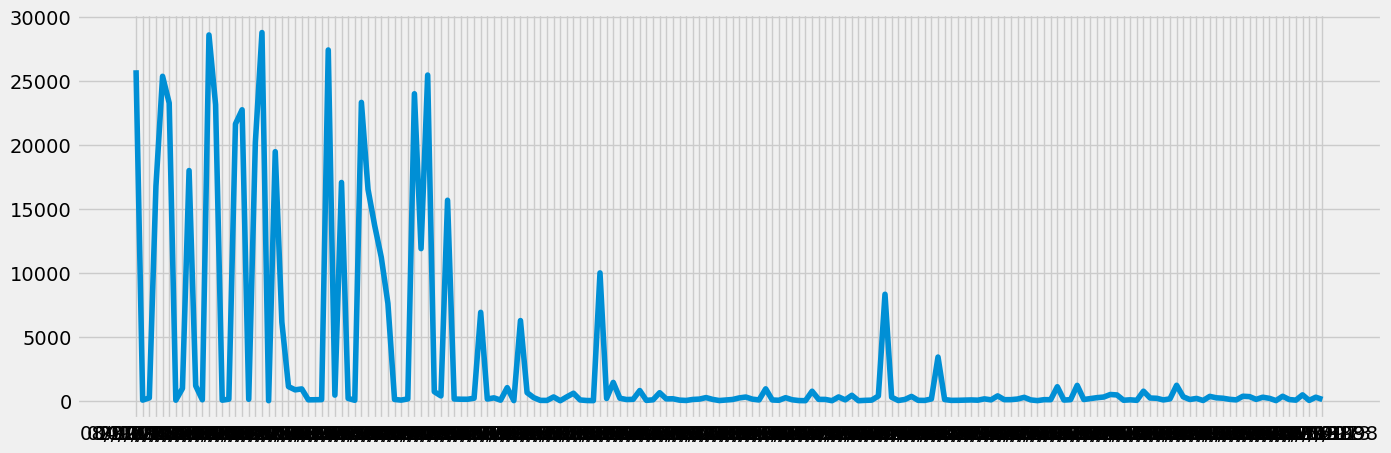

In [12]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_small2)

# Create Line Graph with reset Date Index

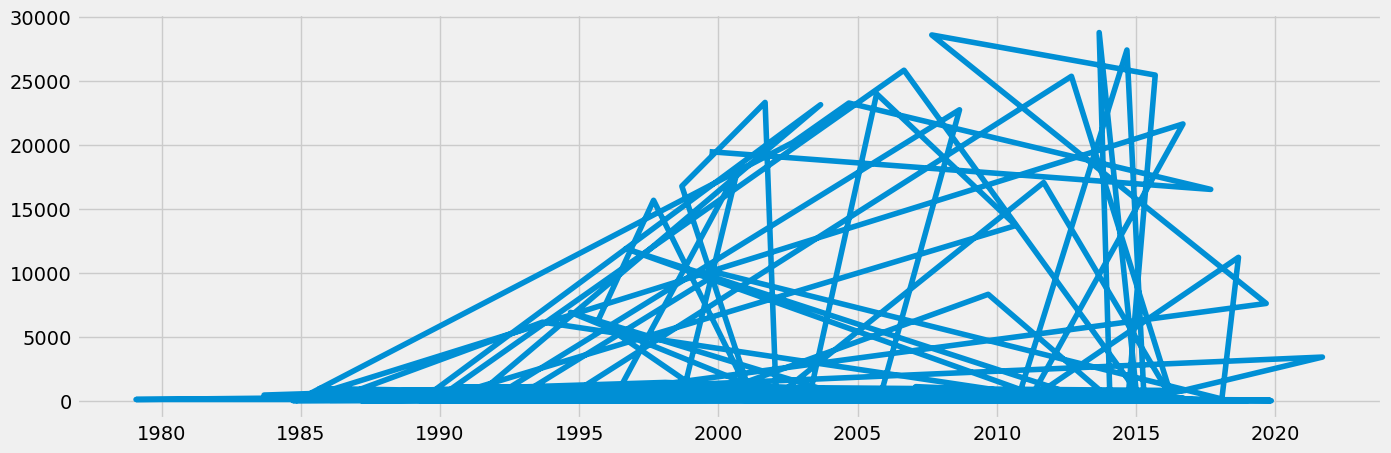

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_small_2)

# Observations on line graphs

- The line graph using the Original Date index appears to be accurate while the reset date index does not appear to be accurate.  Therefore I will move forward with my analysis with assumption that dataframe "data_small2" is accurately timestamped and useful for this analysis.

- This line graph shows that there are days with a high numbers of employees starting to work at "Department of Ed Pedagogical".  Most likely, these days are the start of a new school year.

# Other attempts to create line graph from original data.  Use original index and Date Stamp, remove duplicates at beginning of cleaing.  None of these attempts produce better results.  Move forward with data_small2 dataframe.

In [30]:
data=pd.read_csv(os.path.join(preparedDataPath,'startdate_count.csv'))

In [31]:
data.shape

(869767, 2)

In [32]:
data=data.drop_duplicates()

In [33]:
data.shape

(9080, 2)

In [34]:
data.head()

,Agency Start Date,counts
0,09/06/1988,1203
1,10/20/2015,56
2,09/05/2000,17989
3,10/18/2000,14
4,08/30/2007,28584


In [35]:
data.columns

Index(['Agency Start Date', 'counts'], dtype='object')

In [36]:
data = data.rename(columns={'Agency Start Date': 'Date'})

In [37]:
data.columns

Index(['Date', 'counts'], dtype='object')

In [38]:
#df[df["col"].str.contains("this string")==False]

data[data["Date"].str.contains("9999")==True]

,Date,counts
2385,12/31/9999,154


In [39]:
data = data[data["Date"].str.contains("9999")==False]

In [40]:
data.shape

(9079, 2)

In [41]:
data.head()

,Date,counts
0,09/06/1988,1203
1,10/20/2015,56
2,09/05/2000,17989
3,10/18/2000,14
4,08/30/2007,28584


In [42]:
# Set the "Date" column as the index

from datetime import datetime

data['datetime'] = pd.to_datetime(data['Date']) # Create a datetime column from "Date.""
data = data.set_index('datetime') # Set the datetime as the index of the dataframe.
data.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data.head()

,counts
datetime,
1988-09-06,1203
2015-10-20,56
2000-09-05,17989
2000-10-18,14
2007-08-30,28584


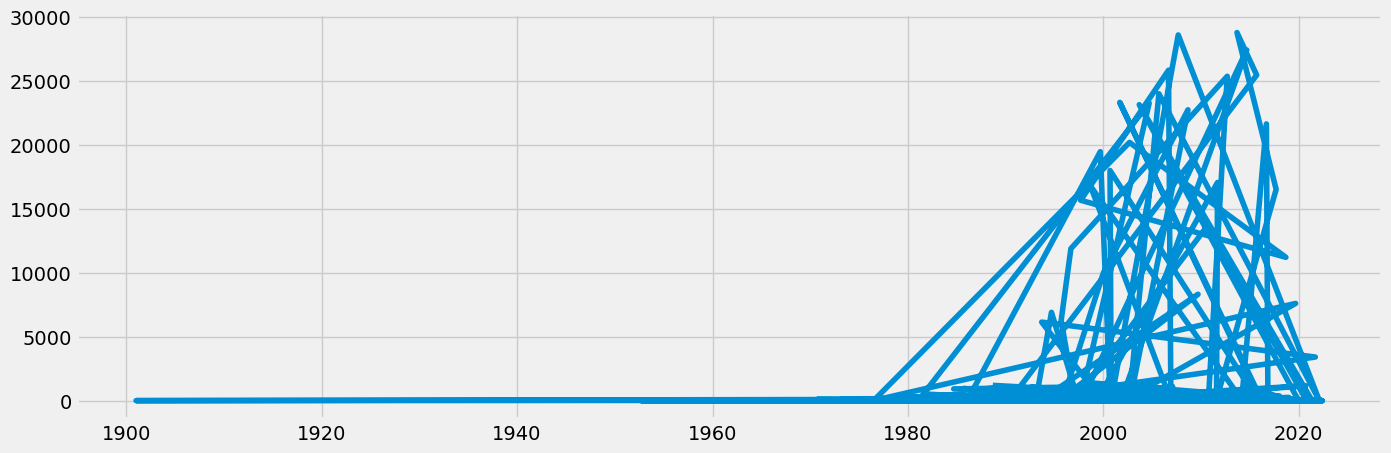

In [43]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [46]:
data_nodups = data.drop_duplicates()

In [47]:
data_nodups.shape

(423, 1)

In [48]:
data_nodups.head()

,counts
datetime,
1988-09-06,1203
2015-10-20,56
2000-09-05,17989
2000-10-18,14
2007-08-30,28584


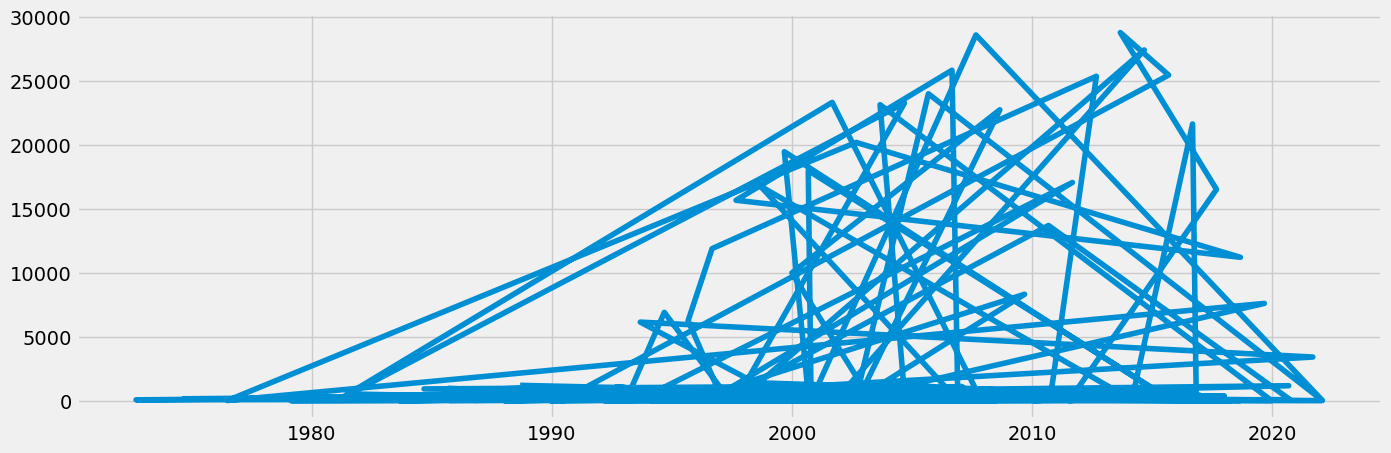

In [49]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_nodups)

# Given data_small2 produces the best line graph, move forward with analysis using this data.

In [60]:
data_small2.head()

,counts
Agency Start Date,
10/21/1996,175
10/29/2013,27
09/06/2005,23988
03/26/2003,9
09/07/2004,23264


In [14]:
# stationarize data_small2
data_diff = data_small2 - data_small2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [15]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [16]:
data_diff.head()

,counts
Agency Start Date,
02/17/1993,-25777.0
04/20/1998,175.0
09/08/1998,16543.0
09/04/2012,8585.0
09/07/2004,-2090.0


In [17]:
data_diff.columns

Index(['counts'], dtype='object')

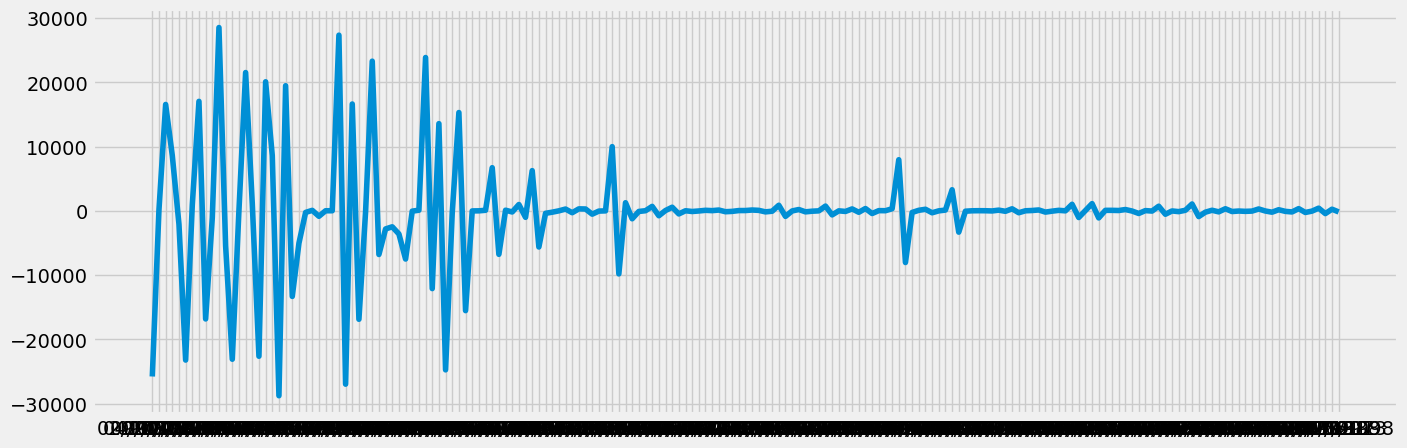

In [18]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [19]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff['counts'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.028469e+00
p-value                        6.274594e-10
Number of Lags Used            1.100000e+01
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


# Interpreting the Dickey - Fuller test
1. This data is stationary.  The Critical Value (5%) is smaller than the Test Statistic.  This means I can reject the null hypothesis.  There is no unit root in this data and the data is stationary.

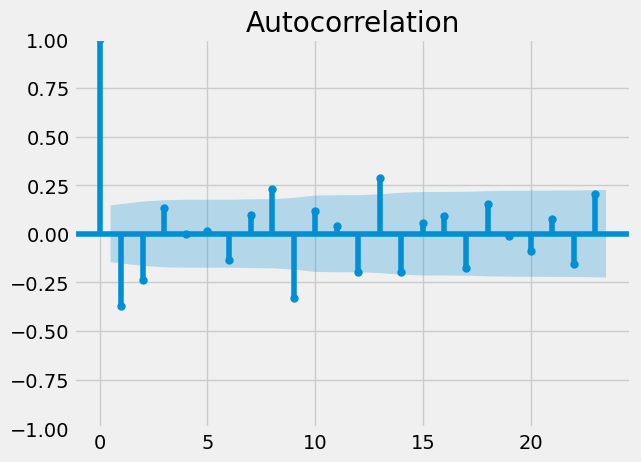

In [20]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()